# 2. Unity ML-Agents 기초 : 구조 & 기본 기능

* 유니버스 : 유니티ML
* 발표자 : 김무성

# 차례 

* A. Unity ML-Agents의 구조
* B. Unity ML-Agents Toolkit
* C. Q-Learning 예제

# A. Unity ML-Agents의 구조 [1]

#### 참고자료
* [1] Bringing Machine Learning to Unity - https://www.slideshare.net/BillLiu31/bringing-machine-learning-to-unity-by-arthur-juliani

<img src="https://image.slidesharecdn.com/bringingmltotheunity-arthurjuliani-180123065041/95/bringing-machine-learning-to-unity-by-arthur-juliani-from-unity-14-638.jpg?cb=1516906769" width=600 />

<img src="https://image.slidesharecdn.com/bringingmltotheunity-arthurjuliani-180123065041/95/bringing-machine-learning-to-unity-by-arthur-juliani-from-unity-17-1024.jpg?cb=1516906769" width=600 />

<img src="https://image.slidesharecdn.com/bringingmltotheunity-arthurjuliani-180123065041/95/bringing-machine-learning-to-unity-by-arthur-juliani-from-unity-21-1024.jpg?cb=1516906769" width=600 />

<img src="https://image.slidesharecdn.com/bringingmltotheunity-arthurjuliani-180123065041/95/bringing-machine-learning-to-unity-by-arthur-juliani-from-unity-25-1024.jpg?cb=1516906769" width=600 />

--------------------

# B. Unity ML-Agents Toolkit [2]
## Environment Basics
This notebook contains a walkthrough of the basic functions of the Python API for the Unity ML-Agents toolkit. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

### 1. Set environment parameters

Be sure to set `env_name` to the name of the Unity environment file you want to launch. Ensure that the environment build is in the `python/` directory.

In [1]:
env_name = "3DBall"  # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from unityagents import UnityEnvironment

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### 3. Start the environment
`UnityEnvironment` launches and begins communication with the environment when instantiated.

Environments contain _brains_ which are responsible for deciding the actions of their associated _agents_. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
env = UnityEnvironment(file_name=env_name)

# Examine environment parameters
print(str(env))

# Set the default brain to work with
default_brain = env.brain_names[0]
brain = env.brains[default_brain]

INFO:unityagents:
'Ball3DAcademy' started successfully!
Unity Academy name: Ball3DAcademy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: Ball3DBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Unity Academy name: Ball3DAcademy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: Ball3DBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 4. Examine the observation and state spaces
We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, _states_ refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, _observations_ refer to a set of relevant pixel-wise visuals for an agent.

In [4]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]

# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

Agent state looks like: 
[-0.01467304 -0.01468306 -0.52082062  4.         -0.79952097  0.
  0.          0.        ]


### 5. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions based on the `action_space_type` of the default brain. 

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [5]:
for episode in range(10):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        if brain.vector_action_space_type == 'continuous':
            env_info = env.step(np.random.randn(len(env_info.agents), 
                                                brain.vector_action_space_size))[default_brain]
        else:
            env_info = env.step(np.random.randint(0, brain.vector_action_space_size, 
                                                  size=(len(env_info.agents))))[default_brain]
        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: 2.0000000447034836
Total reward this episode: 1.2000000327825546
Total reward this episode: 1.4000000357627869
Total reward this episode: 1.500000037252903
Total reward this episode: 1.500000037252903
Total reward this episode: 0.5000000223517418
Total reward this episode: 2.200000047683716
Total reward this episode: 1.2000000327825546
Total reward this episode: 1.0000000298023224
Total reward this episode: 0.40000002086162567


### 6. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [6]:
env.close()

-------------------------

# C. Q-Learning 예제 [3]

## Environment Basics
* 이번 예제는 유니티의 ml-agents 기본 환경으로 있는 GridWorld를 바이너리 형태로 구성해야 한다. 

### 1. Load dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from unityagents import UnityEnvironment

%matplotlib inline

### 2. Set environment parameters

In [2]:
env_name = "GridWorld" # Name of the Unity environment binary to launch
train_mode = True # Whether to run the environment in training or inference mode

### 3. Start the environment

In [3]:
env = UnityEnvironment(file_name=env_name)

# Examine environment parameters
print(str(env))

# Set the default brain to work with
default_brain = env.brain_names[0]
brain = env.brains[default_brain]

INFO:unityagents:
'GridAcademy' started successfully!
Unity Academy name: GridAcademy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		numObstacles -> 1.0
		gridSize -> 5.0
		numGoals -> 1.0
Unity brain name: GridWorldBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Unity Academy name: GridAcademy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		numObstacles -> 1.0
		gridSize -> 5.0
		numGoals -> 1.0
Unity brain name: GridWorldBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 4. Examine the observation and state spaces

Agent state looks like: 
[]
Agent observations look like:


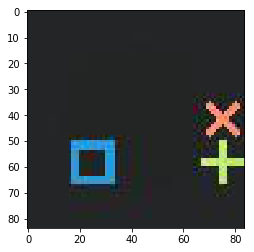

In [4]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]

# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

### 5. Training & Testing

In [5]:
import random

# Initial parameters
Num_Training = 100000
Num_Testing  = 1000 

learning_rate = 0.1
gamma = 0.9
first_epsilon = 1.0
final_epsilon = 0.1

epsilon = first_epsilon

step = 1
score = 0 
episode = 1

# Empty Q table
Q_table = {}


train_mode = True
env_info = env.reset(train_mode=train_mode)[default_brain]
state = env_info.vector_observations[0]
state = str(state)

score_list = []
check_show_progress = 0

while True:
    if step <= Num_Training:
        progress = 'Training'
        train_mode = True
        
        # Choose action
        if random.random() < epsilon or state not in Q_table.keys() :
            # Choose random action
            action = np.random.randint(0, brain.vector_action_space_size, size=(len(env_info.agents)))
        else:
            # Choose greedy action
            action = [np.argmax(Q_table[state])]
  
        env_info = env.step(action)[default_brain]

        next_state = env_info.vector_observations[0]
        next_state = str(next_state)
        reward = env_info.rewards[0]
        terminal = env_info.local_done[0]
        
        # Decrease epsilon while training
        if epsilon > final_epsilon:
            epsilon -= first_epsilon/Num_Training

    elif step <= Num_Training + Num_Testing:
        progress = 'Testing'
        train_mode = False
        
        # Choose greedy action
        action = [np.argmax(Q_table[state])]

        env_info = env.step(action)[default_brain]

        next_state = env_info.vector_observations[0]
        next_state = str(next_state)
        reward = env_info.rewards[0]
        terminal = env_info.local_done[0]
        
        epsilon = 0

    else:
        # Close the environment when learning is finished!
        print('Finished!')
        env.close()
        break

    # Update Q-table!
    if state in Q_table.keys() and next_state in Q_table.keys():
        if terminal == True:
            Q_table[state][action[0]] = (1 - learning_rate) * Q_table[state][action[0]] + learning_rate * (reward)
        else:
            Q_table[state][action[0]] = (1 - learning_rate) * Q_table[state][action[0]] + learning_rate * (reward + gamma * max(Q_table[next_state]))


    # If state or next state is not in Q-table, then add it with zeros
    if state not in Q_table.keys():
        Q_table[state] = []
        for i in range(brain.vector_action_space_size):
            Q_table[state].append(0)
    elif next_state not in Q_table.keys():
        Q_table[next_state] = []
        for i in range(brain.vector_action_space_size):
            Q_table[next_state].append(0)		

    state = next_state
    score += env_info.rewards[0]
    step += 1

       
    # If terminal
    if terminal == True:
        score_list.append(score)
        
        check_show_progress = 1
        episode += 1
        score = 0

        # If game is finished, initialize the state
        env_info = env.reset(train_mode=train_mode)[default_brain]
        state = env_info.vector_observations[0]
        state = str(state)
        
    # Show Progress
    if episode % 100 == 0 and check_show_progress == 1:
        print('Step: ' + str(step) + ' / ' + 'Episode: ' + str(episode) + ' / ' + 'Progress: ' + progress + ' / ' + 'Epsilon: ' + str(epsilon) + ' / ' + 'Avg Score: ' + str(np.mean(score_list)))
        score_list = []
        check_show_progress = 0

Step: 2206 / Episode: 100 / Progress: Training / Epsilon: 0.9779500000001004 / Avg Score: -0.22303029827096246
Step: 4590 / Episode: 200 / Progress: Training / Epsilon: 0.9541100000002088 / Avg Score: -0.14879999488592147
Step: 7325 / Episode: 300 / Progress: Training / Epsilon: 0.9267600000003333 / Avg Score: -0.3036999941058457
Step: 10283 / Episode: 400 / Progress: Training / Epsilon: 0.8971800000004679 / Avg Score: -0.24599999360740185
Step: 13060 / Episode: 500 / Progress: Training / Epsilon: 0.8694100000005943 / Avg Score: -0.1383999940007925
Step: 16202 / Episode: 600 / Progress: Training / Epsilon: 0.8379900000007373 / Avg Score: -0.25489999318495393
Step: 19557 / Episode: 700 / Progress: Training / Epsilon: 0.80444000000089 / Avg Score: -0.2557999927178025
Step: 22379 / Episode: 800 / Progress: Training / Epsilon: 0.7762200000010184 / Avg Score: -0.22289999390020968
Step: 25343 / Episode: 900 / Progress: Training / Epsilon: 0.7465800000011533 / Avg Score: -0.27709999358281495


# 참고자료
* [1] Bringing Machine Learning to Unity - https://www.slideshare.net/BillLiu31/bringing-machine-learning-to-unity-by-arthur-juliani
* [2] Unity ML-Agents 공식 저장소의 Basic.ipynb - https://github.com/Unity-Technologies/ml-agents/blob/master/python/Basics.ipynb
* [3] Kyushik Min's Github : Reinforcement Learning algorithms with Unity ML Agent - https://github.com/Kyushik/Unity_ML_Agent